Objetivo desta análise é tentar extrair insigth e  verificar quais indicadores com base em um setup usado para operar mini-indíce futuro intraday no tempo de 5min, no período de 02-08-2021 a 26-08-2021, utilizando o RFE RECURSIVE FEATURE ELIMINATIONS para verificar quais indicadores melhor funcionam dentro do setup.

O setup usado na operação possui os seguitens indicadores:
- vwap diaria
- vwap semanal
- vwap mensal
- pontos pivot
- media movel 20 periodos
- media movel 200 periodos
- media movel 9 periodos

Usamos esses indicadores como variáveis característcas e comparamos com o preço de fechamento dos candles de 5min, passamos para um modelo de regressão linear usamos RFE para testar e tentar nos retornar quais são os melhores indicadores diante do que o RFE recomendar.



In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split



In [4]:
dataset = pd.read_excel('/content/drive/My Drive/dataset/WinFut.xlsx')

In [5]:
dataset.head()

,data,open,close,max,min,mm20,mm200,mm9,vwap_d,vwap_m,vwap_s,pivot_a,pivot_b
0,26082021,119985,119965,120080,119865,119441.75,120481.82,119376.11,119971.12,118873.43,119993.14,120303.75,120055.00
1,26082021,119515,119575,119575,119435,119441.50,120483.60,119281.11,120447.67,118872.44,119993.18,120992.50,120941.67
2,26082021,119405,119515,119545,119320,119448.25,120487.63,119237.22,120449.69,118872.25,119993.45,120992.50,120941.67
3,26082021,119270,119400,119425,119270,119452.00,120492.52,119215.56,120453.09,118872.01,119993.96,120992.50,120941.67
4,26082021,119115,119275,119290,119105,119457.25,120497.57,119223.33,120457.04,118871.76,119994.55,120992.50,120941.67


In [6]:
dataset.dropna(inplace=True)

In [7]:
#PRIMEIRAMENTE DEVO SEPARAR OS DADOS ENTRE CARACTERISTCAS E CLASSES.
X = dataset.drop(['close'], axis=1)
y = dataset['close']

In [8]:
#VERIFICO SE PRECO FECHAMENTO FOI DROPADO.
X.head()

,data,open,max,min,mm20,mm200,mm9,vwap_d,vwap_m,vwap_s,pivot_a,pivot_b
0,26082021,119985,120080,119865,119441.75,120481.82,119376.11,119971.12,118873.43,119993.14,120303.75,120055.00
1,26082021,119515,119575,119435,119441.50,120483.60,119281.11,120447.67,118872.44,119993.18,120992.50,120941.67
2,26082021,119405,119545,119320,119448.25,120487.63,119237.22,120449.69,118872.25,119993.45,120992.50,120941.67
3,26082021,119270,119425,119270,119452.00,120492.52,119215.56,120453.09,118872.01,119993.96,120992.50,120941.67
4,26082021,119115,119290,119105,119457.25,120497.57,119223.33,120457.04,118871.76,119994.55,120992.50,120941.67


In [9]:
#IMPORTANDO OS ALGORITMOS A SEREM USADOS
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [10]:
#PASSO O MODELO DE REGRESSÃO LINEAR PARA VARAIVEL MODEL
#INFORMA QUANTIDADE DE ATRIBUTOS(CARACTERISTICAS) QUERO TRABALHAR, NESTE CASO SELECIONEI 7
model = LinearRegression()
rfe = RFE(model, 7)

In [11]:
#ENTREGO OS DADOS PARA O RFE, E ELE FAZ TODA A PARTE DE CRIACAO DE MODELOS E TESTES PARA RETORNAR OS MELHORES FEATURES A SEREM TRABALHADAS.
fit = rfe.fit(X,y)

In [12]:
#IMPRIMO O NUMERO DE FEATURES
print("Numero de features: {}".format(fit.n_features_))

Numero de features: 7


In [13]:
#VIZUALIZO QUAIS SAO AS MELHORES CARACTERISTICAS(FEATURES), GERADAS PELO RFE.
cols = fit.get_support(indices=True)
dataset.iloc[:,cols]

,open,close,max,min,mm20,mm200,vwap_m
0,119985,119965,120080,119865,119441.75,120481.82,118873.43
1,119515,119575,119575,119435,119441.50,120483.60,118872.44
2,119405,119515,119545,119320,119448.25,120487.63,118872.25
3,119270,119400,119425,119270,119452.00,120492.52,118872.01
4,119115,119275,119290,119105,119457.25,120497.57,118871.76
...,...,...,...,...,...,...,...
1570,124950,125045,125045,124950,123771.00,126183.50,124893.02
1571,124755,124755,124755,124755,123732.50,126187.70,124662.00
1572,124750,124785,124785,124750,123710.25,126189.73,124600.00
1573,124650,124650,124650,124650,123679.00,126190.18,124473.00


In [14]:
#ARMAZENANDO CADA COLUNA EM SUAS RESPECTIVAS VARIÁVEIS
data = dataset['data']
open = dataset['open']
close = dataset['close']
maxima = dataset['max']
minima = dataset['min']
media_20 = dataset['mm20']
media_200 = dataset['mm200']
vwap_mes = dataset['vwap_m']
pivot_a = dataset['pivot_a']
pivot_b = dataset['pivot_b']


#####COM BASE NOS CARACTERISTICAS RETORNADAS PELO ALGORITIMO, VAMOS VERIFICAR PELO GRÁFICO COMO O PREÇO SE COMPORTA EM RELAÇÃO AOS INDICADORES RETORNADOS PELO RFE.

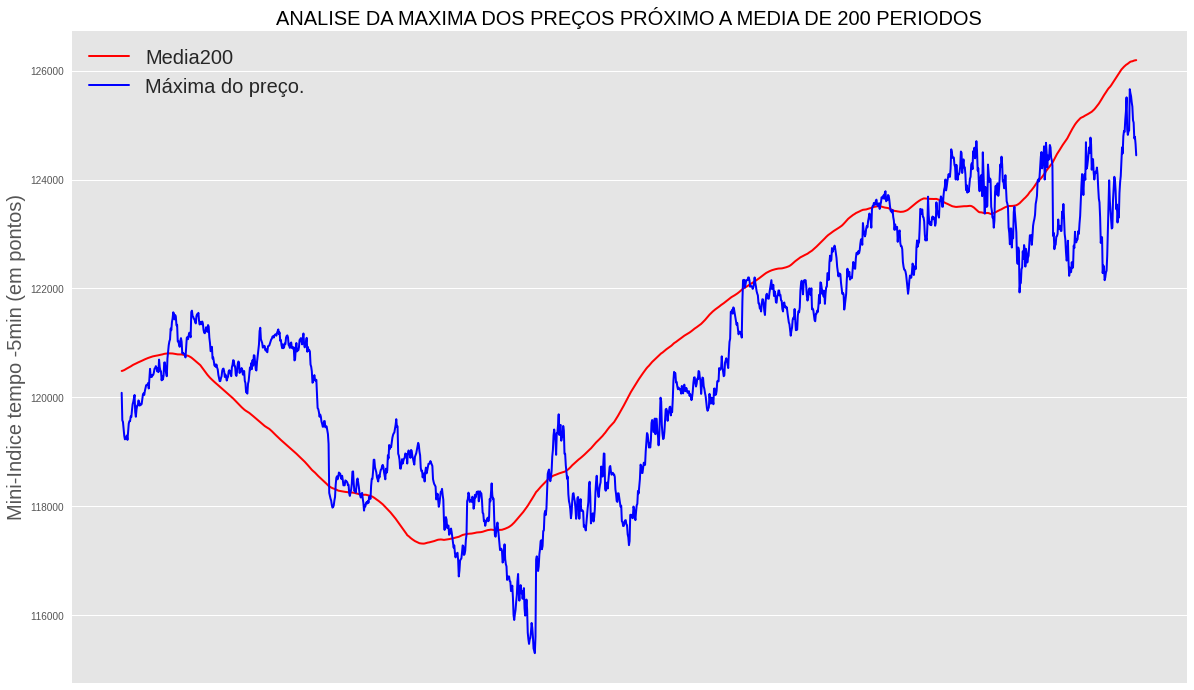

In [ ]:
#COMPARANDO OS INDICADORES COM PRECO DE FECHAMENTO
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MAXIMA DOS PREÇOS PRÓXIMO A MEDIA DE 200 PERIODOS', color = 'black', fontsize=20)
plt.plot(media_200, c ='red', lw='2', label='Media200')
plt.plot(maxima, c ='blue',lw='2', label='Máxima do preço.')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

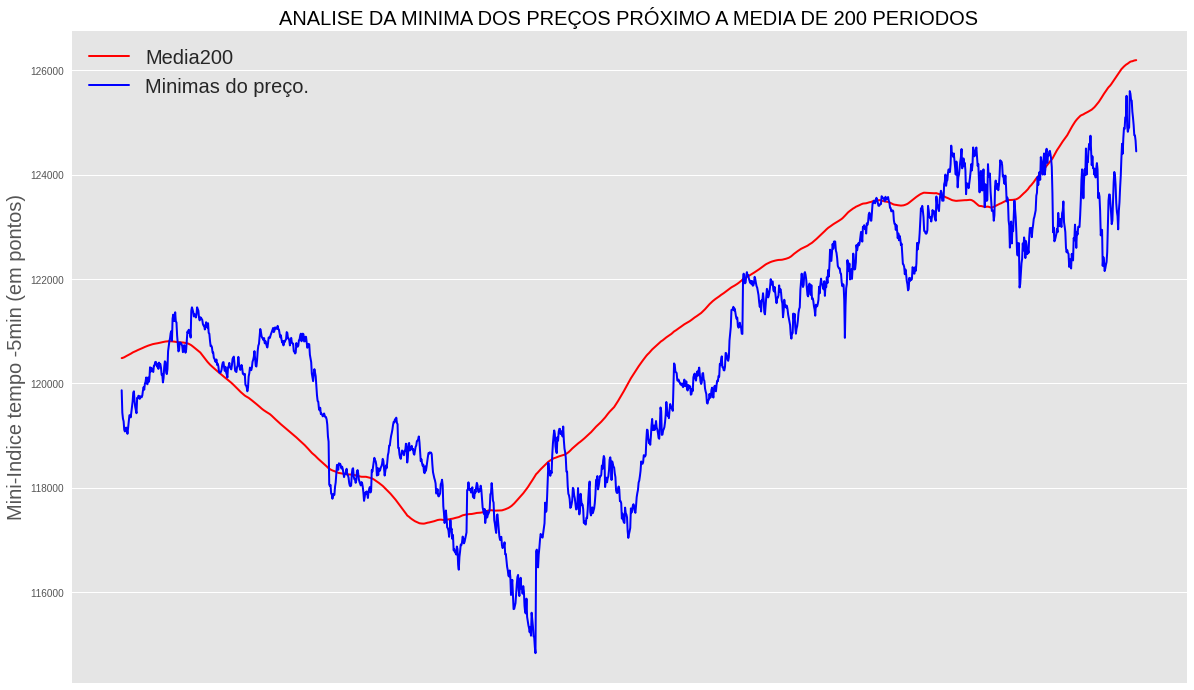

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MINIMA DOS PREÇOS PRÓXIMO A MEDIA DE 200 PERIODOS', color = 'black', fontsize=20)
plt.plot(media_200, c ='red', lw='2', label='Media200')
plt.plot(minima, c ='blue',lw='2', label='Minimas do preço.')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

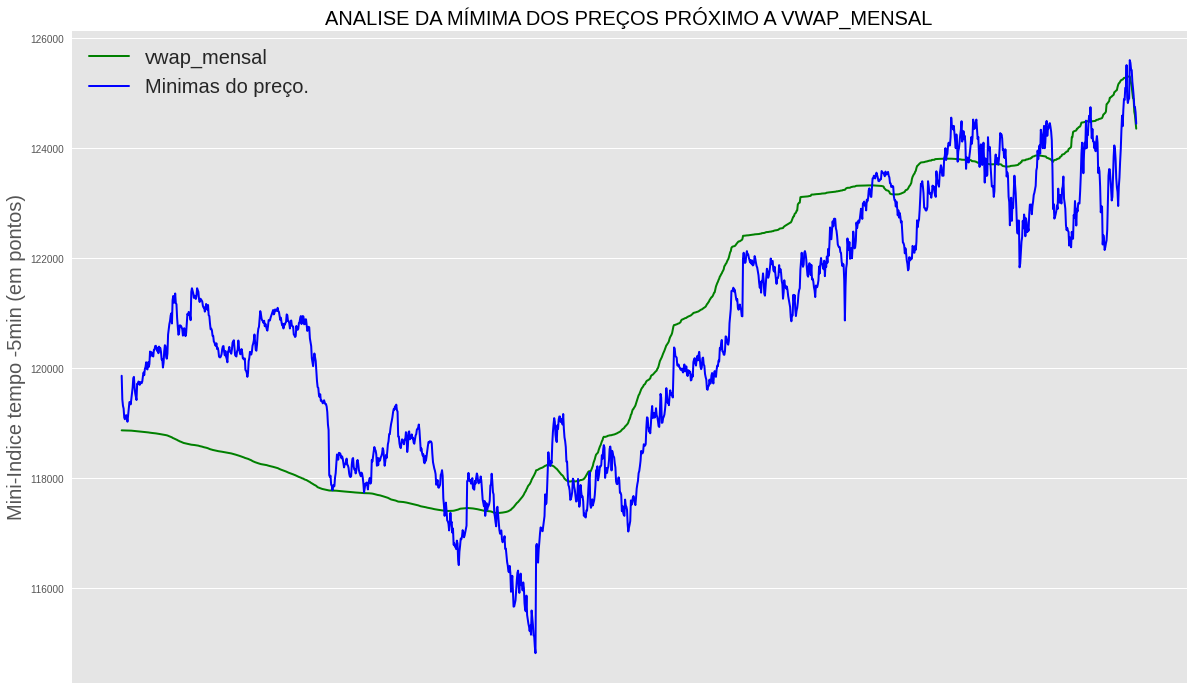

In [ ]:
#COMPARANDO OS INDICADORES COM A MINIMA DO PREÇO
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MÍMIMA DOS PREÇOS PRÓXIMO A VWAP_MENSAL', color = 'black', fontsize=20)
plt.plot(vwap_mes, c ='g', lw='2', label='vwap_mensal')
plt.plot(minima, c ='blue',lw='2', label='Minimas do preço.')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

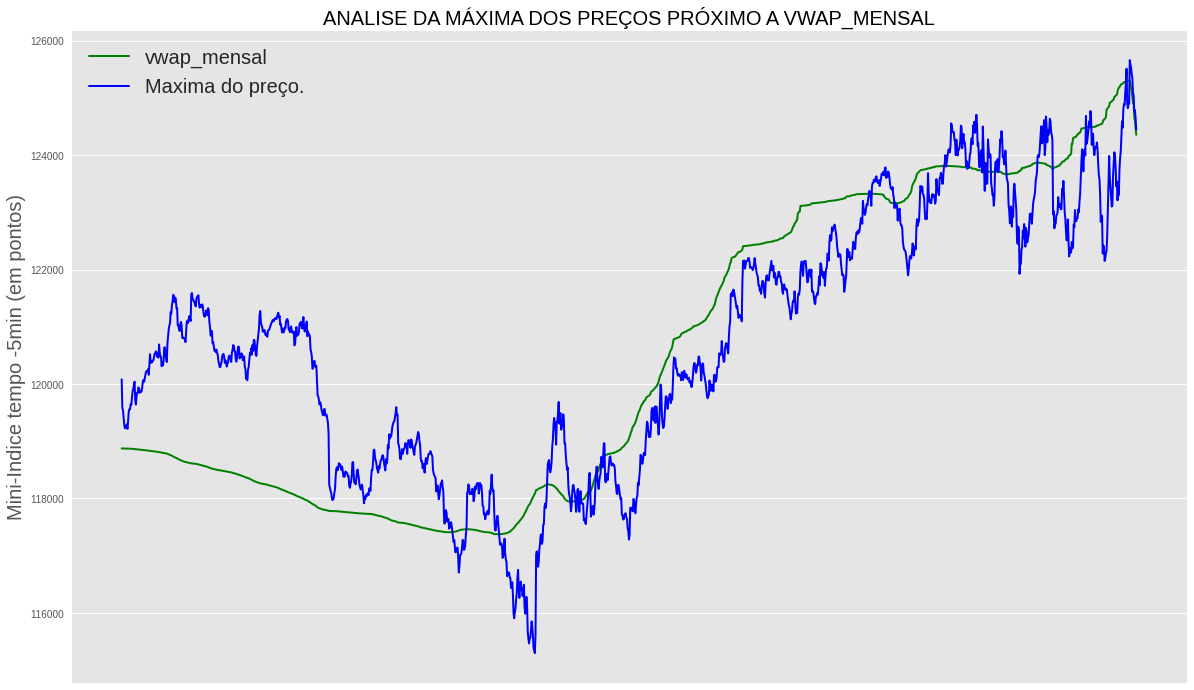

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MÁXIMA DOS PREÇOS PRÓXIMO A VWAP_MENSAL', color = 'black', fontsize=20)
plt.plot(vwap_mes, c ='g', lw='2', label='vwap_mensal')
plt.plot(maxima, c ='blue',lw='2', label='Maxima do preço.')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

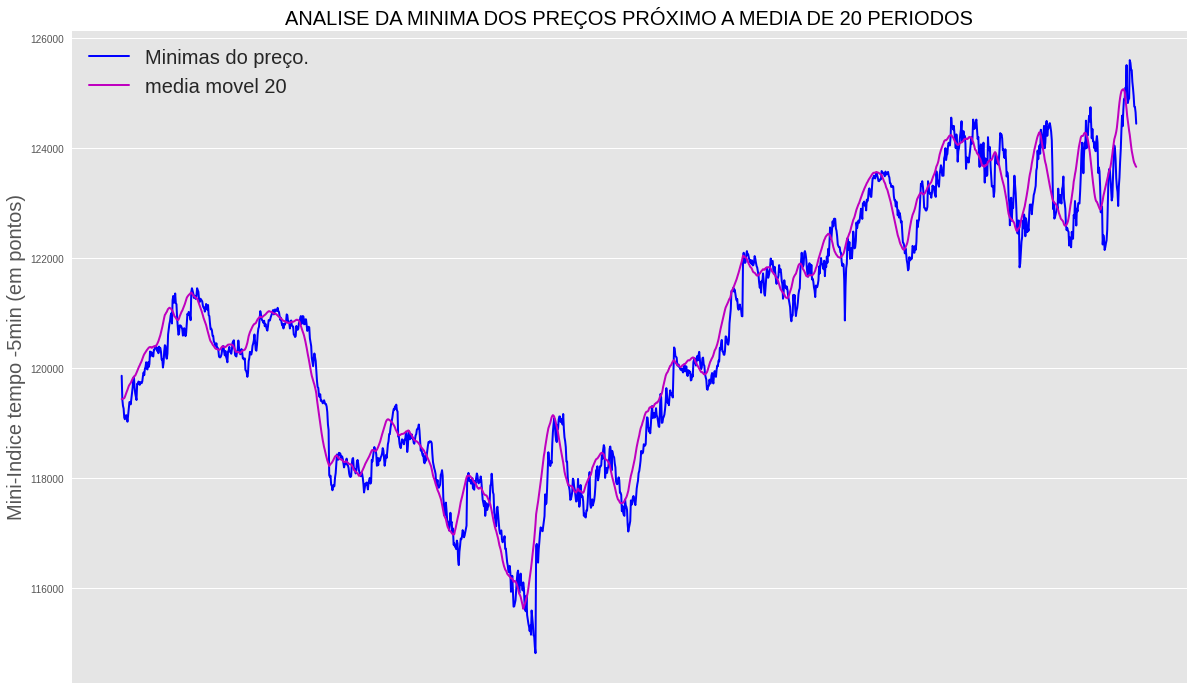

In [ ]:
#COMPARANDO OS INDICADORES COM PRECO DE FECHAMENTO
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MINIMA DOS PREÇOS PRÓXIMO A MEDIA DE 20 PERIODOS', color = 'black', fontsize=20)
plt.plot(minima, c ='blue',lw='2', label='Minimas do preço.')
plt.plot(media_20, c ='m', lw='2', label='media movel 20')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

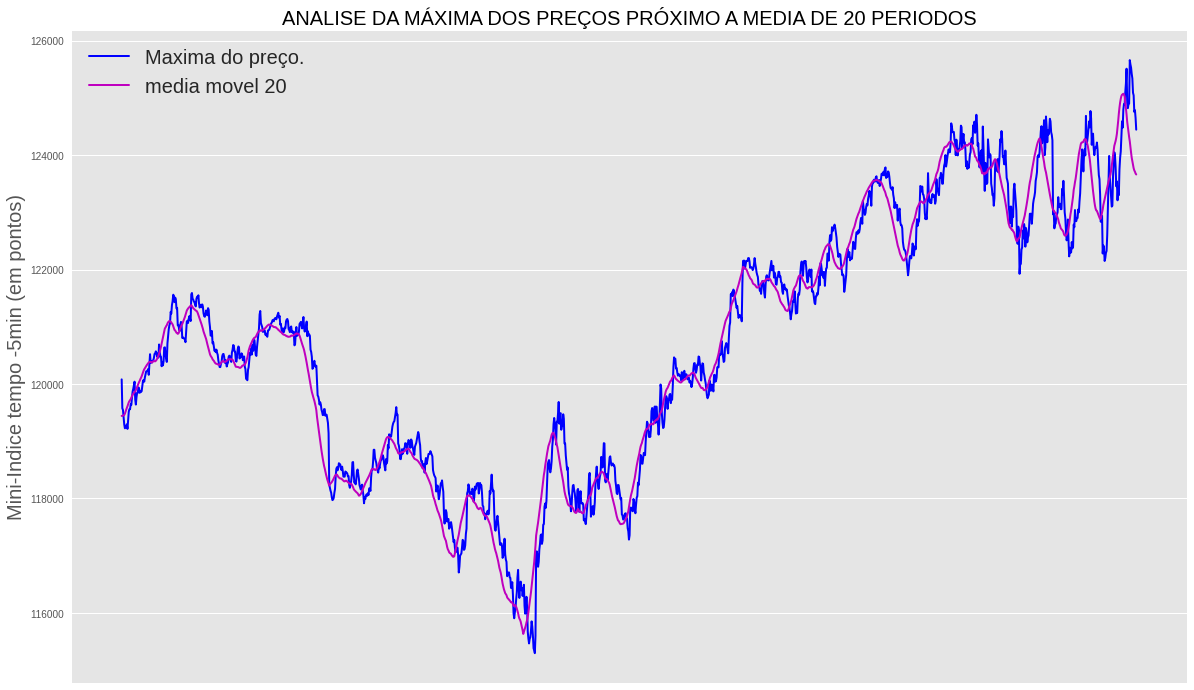

In [ ]:
#COMPARANDO OS INDICADORES COM PRECO DE FECHAMENTO
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MÁXIMA DOS PREÇOS PRÓXIMO A MEDIA DE 20 PERIODOS', color = 'black', fontsize=20)
plt.plot(maxima, c ='blue',lw='2', label='Maxima do preço.')
plt.plot(media_20, c ='m', lw='2', label='media movel 20')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

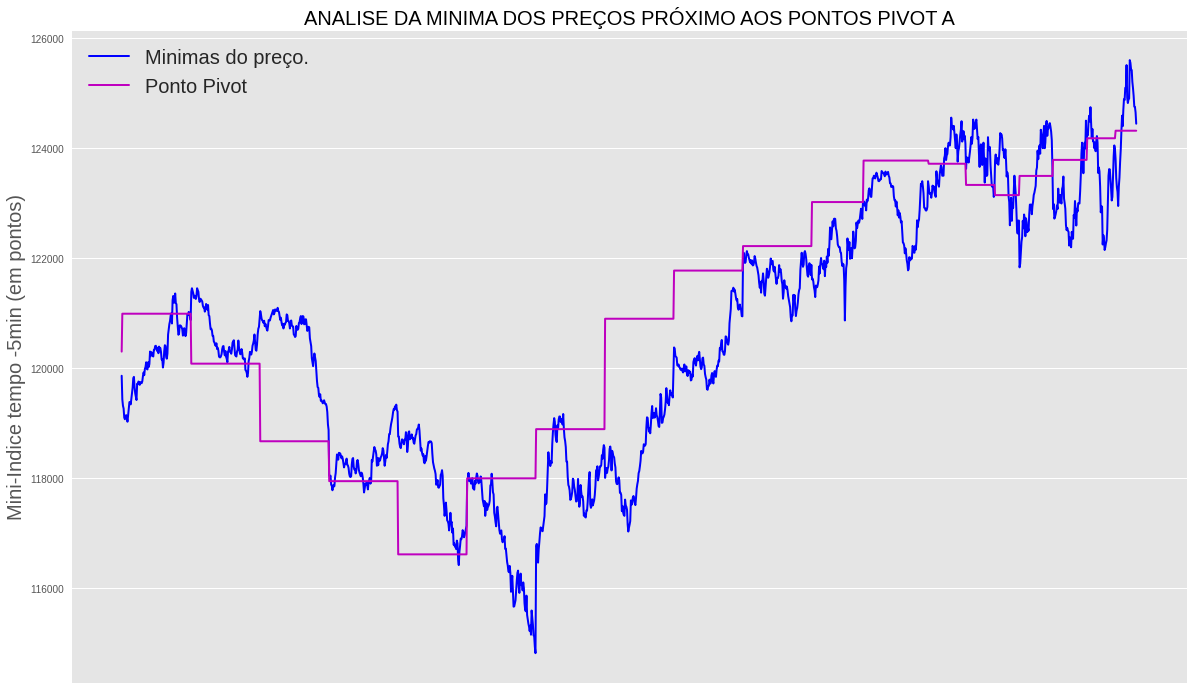

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MINIMA DOS PREÇOS PRÓXIMO AOS PONTOS PIVOT A', color = 'black', fontsize=20)
plt.plot(minima, c ='blue',lw='2', label='Minimas do preço.')
plt.plot(pivot_a, c ='m', lw='2', label='Ponto Pivot')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

#####NESSA ANÁLISE DO PONTO PIVOT A QUE TEM COMO PARAMETRO O PRECO DE ABERTURA, NOTA-SE QUE AS MINIMAS DO PREÇO AO TOCAR NO PONTO PIVOT RESPEITA MAIS DO QUE NO GRAFICO DOS PONTOS PIVOT B. PODEMOS TOMAR UMA MELHOR DECISÃO AO ABRIR UMA ORDEM COM UMA PROBABILIDADE DE ACERTO MAIOR, ESSA ANÁLISE AUXILIA MELHOR PARA TOMARMOS UMA DECISAO DE COMPRA QUANDO OS PRECO TOCAM NO PONTO PIVOT A, SENDO QUE A MINIMA DO PREÇO NAO ROMPO MUITO O SUPORTE DO PIVOT, JÁ NOGRAFICO DO PONTO PIVOT B NOTAMOS QUE AS MINIMAS DO PRECO ROMPEM MAIS O SUPORTE DO PIVOT AUMENTANDO MAIS A POSSIBILIDADE DE ATIVAR O STOP LOSS.

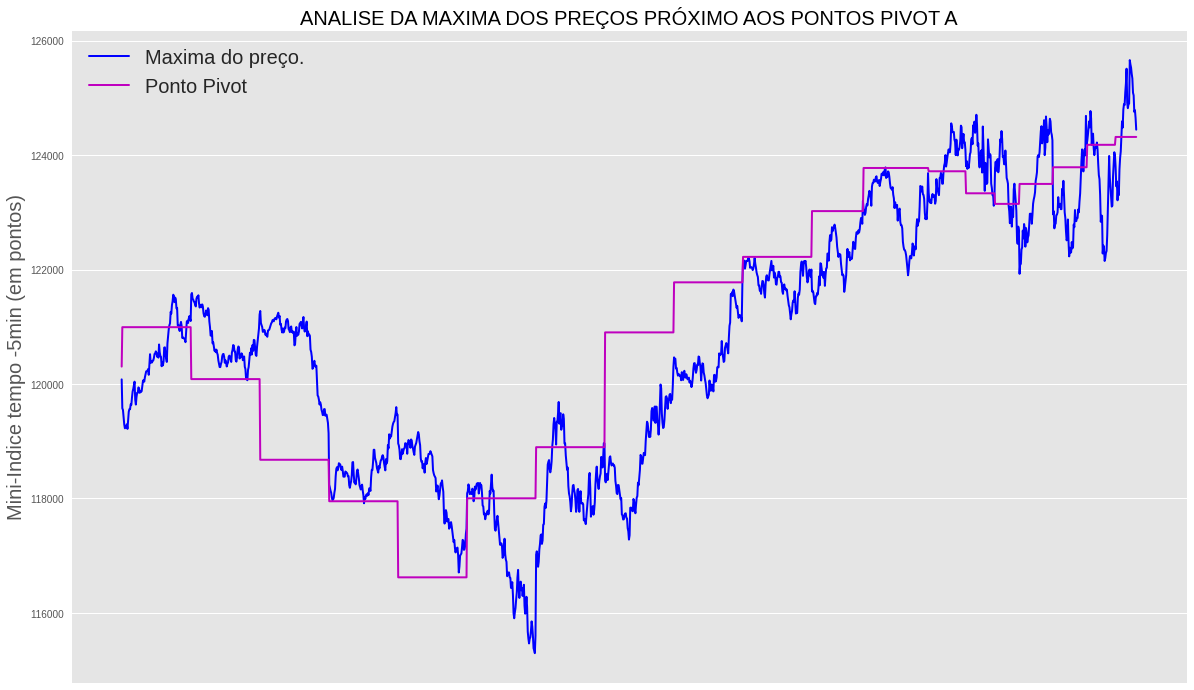

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MAXIMA DOS PREÇOS PRÓXIMO AOS PONTOS PIVOT A', color = 'black', fontsize=20)
plt.plot(maxima, c ='blue',lw='2', label='Maxima do preço.')
plt.plot(pivot_a, c ='m', lw='2', label='Ponto Pivot')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

A MAXIMA DOS PRECÇOS DEMOSTRARAM UMA MAIOR PROBABILIDADE DE ASSERTIVIDADE QUANDO TOCADOS NA RESITENCIA DOS PONTOS PIVOT.

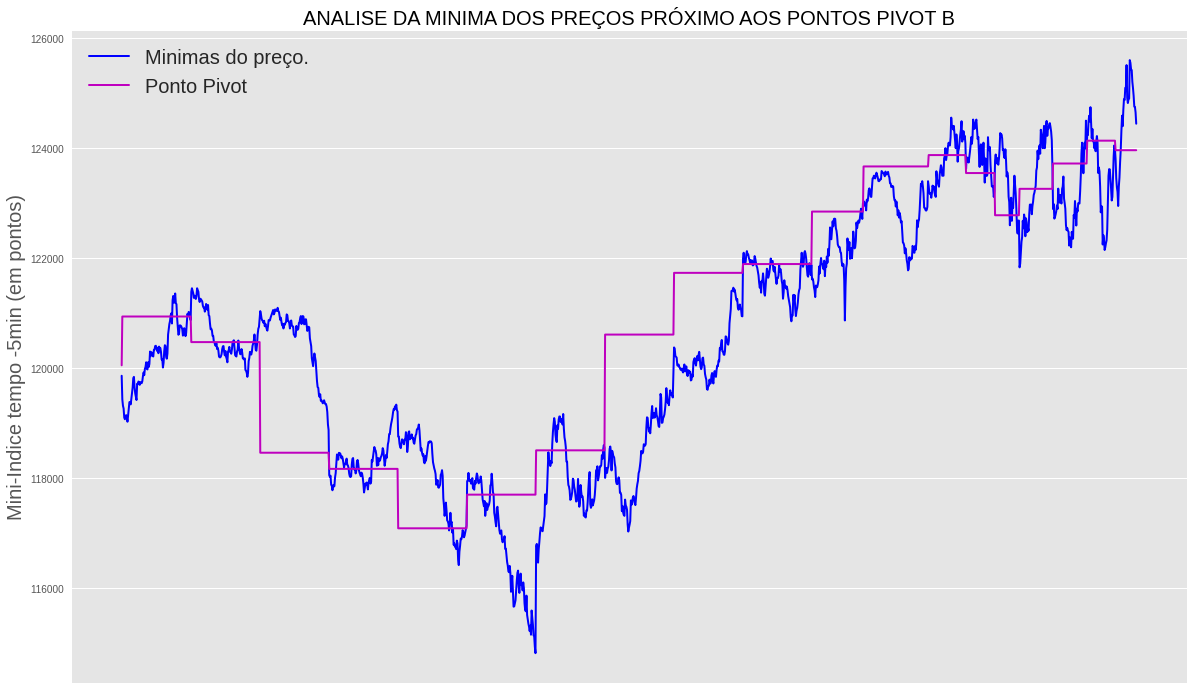

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MINIMA DOS PREÇOS PRÓXIMO AOS PONTOS PIVOT B', color = 'black', fontsize=20)
plt.plot(minima, c ='blue',lw='2', label='Minimas do preço.')
plt.plot(pivot_b, c ='m', lw='2', label='Ponto Pivot')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

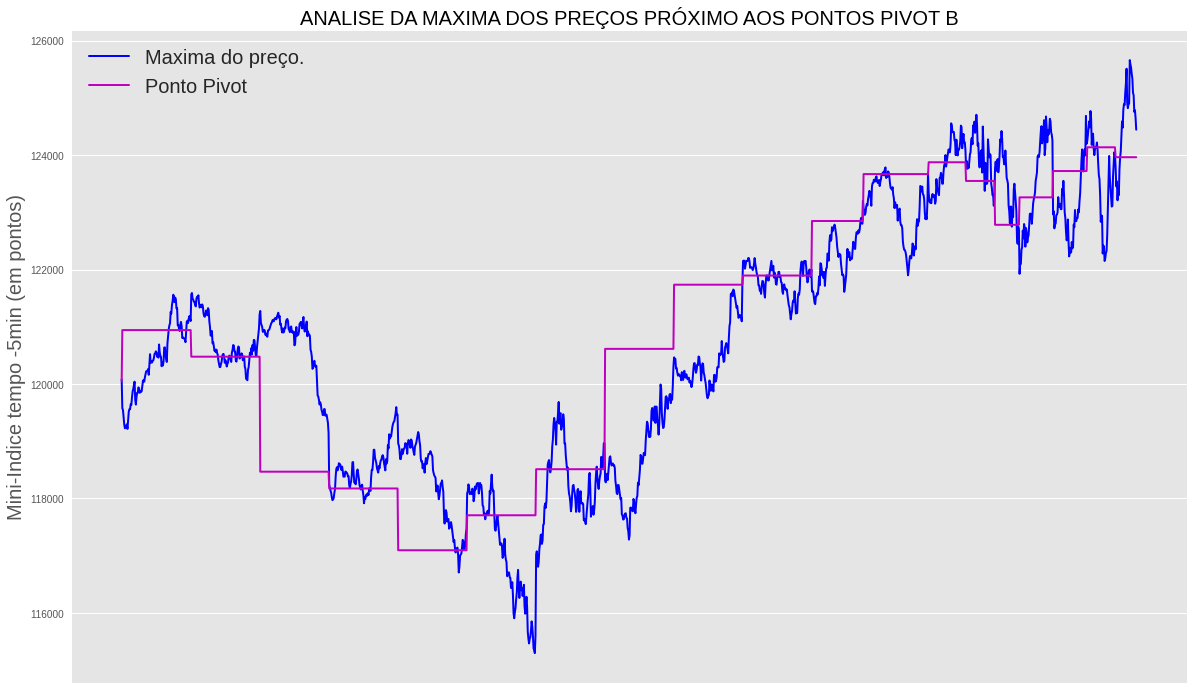

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
plt.title('ANALISE DA MAXIMA DOS PREÇOS PRÓXIMO AOS PONTOS PIVOT B', color = 'black', fontsize=20)
plt.plot(maxima, c ='blue',lw='2', label='Maxima do preço.')
plt.plot(pivot_b, c ='m', lw='2', label='Ponto Pivot')
plt.legend(prop={'size': 20})
plt.ylabel('Mini-Indice tempo -5min (em pontos)', fontsize=20)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

#####ESSA ANÁLISE TEM COMO AUXILIAR EM UMA MELHOR ESCOLHA DOS INDICADORES E COM BASE DE COMO OS PREÇOS SE COMPORTAM EM RELAÇÃO AO INDICADORE PARA PODERMO TER UMA MELHOR DECISÃO AO ABRIR UMA ORDEM DE COMPRA OU DE VENDA, TENTADO REDUZIR AO MÁXIMO AS PERDAS.